In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_table("marketing_campaign.csv")

## 데이터 살펴보기

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [6]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

## 고객의 연령층 

In [7]:
year=np.array(data["Year_Birth"])

age = lambda x : 2021-x
ages=age(year)
bins = [0, 17, 65, 79, 99, 130]

group_names = ['Underage', 'Youth', 'Middle-aged', 'Senior', 'Long-lived elderly']
Age = pd.cut(ages, bins, labels=group_names)
pd.value_counts(Age)

Youth                 1872
Middle-aged            363
Long-lived elderly       3
Senior                   2
Underage                 0
dtype: int64

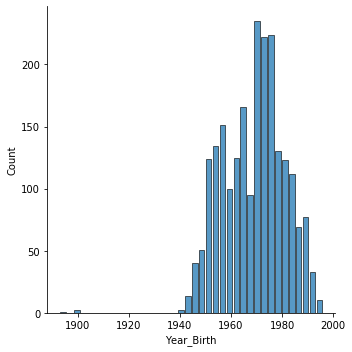

In [8]:
sns.displot(data=data, x="Year_Birth", shrink=0.8)

## 웹사이트, 카탈로그, 매장방문중 고객의 이용이 많은 것

In [9]:
IDdata=data.set_index(['ID'])

In [10]:
V_data = IDdata.loc[:,'NumWebPurchases':'NumStorePurchases']
V_data

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
ID,,,
5524,8,10,4
2174,1,1,2
4141,8,2,10
6182,2,0,4
5324,5,3,6
...,...,...,...
10870,9,3,4
4001,8,2,5
7270,2,3,13


In [11]:
count = np.sum(V_data, axis=0)
print(count)

NumWebPurchases         9150
NumCatalogPurchases     5963
NumStorePurchases      12970
dtype: int64


## 연령층별 이용이 많은 쇼핑방식

In [12]:
V_data['age'] = Age
V_data

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,age
ID,,,,
5524,8,10,4,Youth
2174,1,1,2,Middle-aged
4141,8,2,10,Youth
6182,2,0,4,Youth
5324,5,3,6,Youth
...,...,...,...,...
10870,9,3,4,Youth
4001,8,2,5,Middle-aged
7270,2,3,13,Youth


In [13]:
web = (V_data['NumWebPurchases']>V_data['NumCatalogPurchases']) & (V_data['NumWebPurchases']>V_data['NumStorePurchases'])
V_data[web]['age'].value_counts()

Youth                 258
Middle-aged            67
Long-lived elderly      0
Senior                  0
Underage                0
Name: age, dtype: int64

In [14]:
catalog = (V_data['NumCatalogPurchases']>V_data['NumWebPurchases']) & (V_data['NumCatalogPurchases']>V_data['NumStorePurchases'])
V_data[catalog]['age'].value_counts()

Youth                 97
Middle-aged           38
Long-lived elderly     1
Senior                 1
Underage               0
Name: age, dtype: int64

In [15]:
store = (V_data['NumStorePurchases']>V_data['NumWebPurchases']) & (V_data['NumStorePurchases']>V_data['NumCatalogPurchases'])
V_data[store]['age'].value_counts()

Youth                 1253
Middle-aged            223
Long-lived elderly       1
Senior                   1
Underage                 0
Name: age, dtype: int64

## 연령층별 소득비교 

In [16]:
data['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [17]:
IDdata['age'] = Age

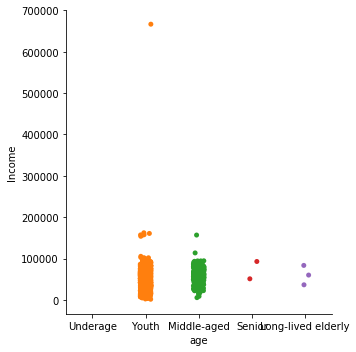

In [18]:
sns.catplot(data=IDdata, x='age', y='Income')

## 소득과 지출금액의 관계

In [19]:
o_data=pd.DataFrame({ })
Price = data.loc[:,'MntWines':'MntGoldProds']
sumPrice=Price.sum(axis=1)
o_data['Income']=data['Income']
o_data['sumPrice']=sumPrice

In [20]:
import statsmodels.api as sm

reg = sm.OLS.from_formula("Income ~ sumPrice", o_data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     1780.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):          5.84e-286
Time:                        11:39:43   Log-Likelihood:                -24946.
No. Observations:                2216   AIC:                         4.990e+04
Df Residuals:                    2214   BIC:                         4.991e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.533e+04    565.206     62.501      0.000    3.42e+04    3.64e+04
sumPrice      27.8735      0.661     42.189      0.000      26.578      29.169
==============================================================================
Omnibus:                     4695.111   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30793220.286
Skew:                          17.639   Prob(JB):                         0.00
Kurtosis:                     579.417   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 물품별 지출금액 살펴보기

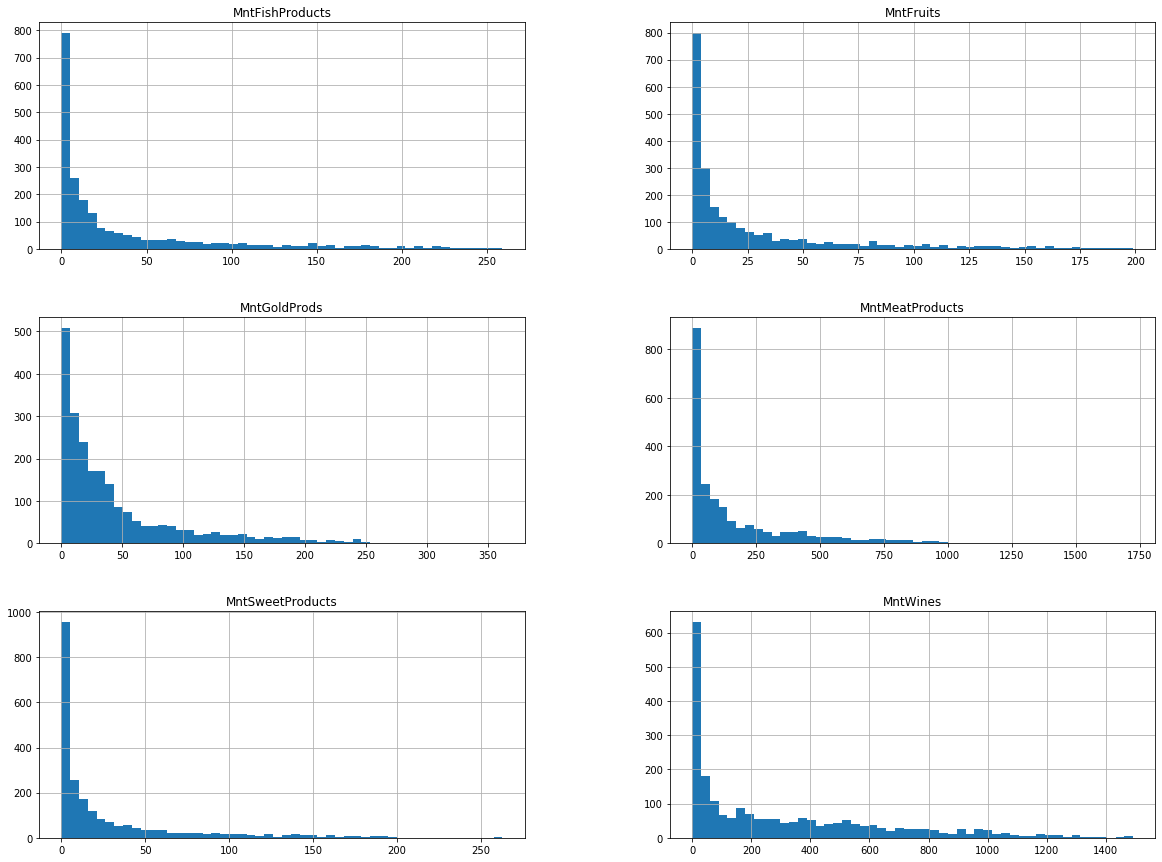

In [21]:
Price.hist(bins=50, figsize=(20,15))
plt.show()
#세로가 사람수 가로가 지출금액

In [22]:
data['MntWines'].describe()

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64

In [23]:
data['MntFruits'].describe()

count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64

In [24]:
data['MntMeatProducts'].describe()

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64

In [25]:
data['MntFishProducts'].describe()

count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64

In [26]:
data['MntSweetProducts'].describe()

count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       263.000000
Name: MntSweetProducts, dtype: float64

In [27]:
data['MntGoldProds'].describe()

count    2240.000000
mean       44.021875
std        52.167439
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       362.000000
Name: MntGoldProds, dtype: float64

## 자녀가 있는 가정의 결혼여부

In [28]:
home = (data.Kidhome >=1) | (data.Teenhome >=1)

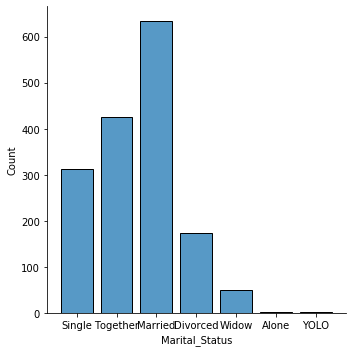

In [29]:
sns.displot(data=data[home], x='Marital_Status', shrink=0.8)

In [30]:
data[home]['Marital_Status'].value_counts()

Married     634
Together    426
Single      313
Divorced    174
Widow        50
Alone         3
YOLO          2
Name: Marital_Status, dtype: int64

## 결혼했고 자녀가 있는 가정의 각 분류별 지출액 평균 

In [31]:
married = data.Marital_Status == "Married"
nomarried = data.Marital_Status != "Married"
kid = data.Kidhome>=1

In [32]:
data[married]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
11,387,1976,Basic,Married,7500.0,0,0,13-11-2012,59,6,...,8,0,0,0,0,0,0,3,11,0
14,2569,1987,Graduation,Married,17323.0,0,0,10-10-2012,38,3,...,8,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,4478,1979,Graduation,Married,63777.0,1,1,24-03-2013,87,457,...,8,0,0,0,0,0,0,3,11,0
2229,10084,1972,Graduation,Married,24434.0,2,0,18-05-2014,9,3,...,7,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0


In [33]:
data[kid]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,...,9,1,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,7,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0


In [34]:
MK = pd.merge(data[married],data[kid], how='inner')
MK

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
1,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
2,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
3,9736,1980,Graduation,Married,41850.0,1,1,24-12-2012,51,53,...,8,0,0,0,0,0,0,3,11,0
4,5376,1979,Graduation,Married,2447.0,1,0,06-01-2013,42,1,...,1,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1448,1963,Master,Married,33562.0,1,2,25-06-2014,33,21,...,4,0,0,0,0,0,0,3,11,0
369,4478,1979,Graduation,Married,63777.0,1,1,24-03-2013,87,457,...,8,0,0,0,0,0,0,3,11,0
370,10084,1972,Graduation,Married,24434.0,2,0,18-05-2014,9,3,...,7,0,0,0,0,0,0,3,11,0
371,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,...,7,0,0,0,0,0,0,3,11,0


In [35]:
MK["Marital_Status"].value_counts()

Married    373
Name: Marital_Status, dtype: int64

In [36]:
MK["Kidhome"].value_counts()

1    352
2     21
Name: Kidhome, dtype: int64

In [37]:
MKPrice = MK.loc[:,'MntWines':'MntGoldProds']

In [38]:
MKPrice.cumsum(axis=0)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,173,43,118,46,27,15
1,249,53,174,49,28,38
2,254,58,180,49,30,39
3,307,63,199,51,43,43
4,308,64,1924,52,44,44
...,...,...,...,...,...,...
368,43778,3290,19610,4378,3409,8508
369,44235,3295,19716,4393,3426,8561
370,44238,3297,19724,4413,3426,8578
371,44241,3300,19731,4419,3428,8587


#### 결혼안했고 자녀도 없는 가정의 분류별 지출금액

In [39]:
data[nomarried]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,...,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,6,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0


In [40]:
noKid = data.Kidhome ==0
data[noKid]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
11,387,1976,Basic,Married,7500.0,0,0,13-11-2012,59,6,...,8,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,...,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,...,4,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0


In [41]:
noMK = pd.merge(data[nomarried],data[noKid], how='inner')
noMK

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
2,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
3,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
4,2125,1959,Graduation,Divorced,63033.0,0,0,15-11-2013,82,194,...,2,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,8720,1978,2n Cycle,Together,NaN,0,0,12-08-2012,53,32,...,0,0,1,0,0,0,0,3,11,0
798,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,...,8,0,0,0,0,0,0,3,11,0
799,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,...,4,0,0,0,0,0,0,3,11,0
800,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0


In [42]:
noMKPrice = noMK.loc[:,'MntWines':'MntGoldProds']

In [43]:
MKPrice.cumsum(axis=0)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,173,43,118,46,27,15
1,249,53,174,49,28,38
2,254,58,180,49,30,39
3,307,63,199,51,43,43
4,308,64,1924,52,44,44
...,...,...,...,...,...,...
368,43778,3290,19610,4378,3409,8508
369,44235,3295,19716,4393,3426,8561
370,44238,3297,19724,4413,3426,8578
371,44241,3300,19731,4419,3428,8587


#### 결혼했고 자녀가 있는 가정의 평균 지출금액

In [44]:
print(np.average(MKPrice.MntWines))
print(np.average(MKPrice.MntFruits))
print(np.average(MKPrice.MntMeatProducts))
print(np.average(MKPrice.MntFishProducts))
print(np.average(MKPrice.MntSweetProducts))
print(np.average(MKPrice.MntGoldProds))

118.83378016085791
8.855227882037534
53.061662198391424
11.85254691689008
9.193029490616622
23.07774798927614


#### 결혼 안했고 자녀가 없는 가정의 평균 지출금액

In [45]:
print(np.average(noMKPrice.MntWines))
print(np.average(noMKPrice.MntFruits))
print(np.average(noMKPrice.MntMeatProducts))
print(np.average(noMKPrice.MntFishProducts))
print(np.average(noMKPrice.MntSweetProducts))
print(np.average(noMKPrice.MntGoldProds))

460.02618453865335
39.903990024937656
261.072319201995
57.942643391521194
40.80299251870324
61.3927680798005


#### 결혼가정의 평균 지출금액

In [46]:
mm=data[married].loc[:,'MntWines':'MntGoldProds']

In [47]:
print(np.average(mm.MntWines))
print(np.average(mm.MntFruits))
print(np.average(mm.MntMeatProducts))
print(np.average(mm.MntFishProducts))
print(np.average(mm.MntSweetProducts))
print(np.average(mm.MntGoldProds))

299.4803240740741
25.734953703703702
160.68171296296296
35.38078703703704
26.70138888888889
42.822916666666664


#### 모든 가정의 평균 지출금액

In [48]:
print(np.average(Price.MntWines))
print(np.average(Price.MntFruits))
print(np.average(Price.MntMeatProducts))
print(np.average(Price.MntFishProducts))
print(np.average(Price.MntSweetProducts))
print(np.average(Price.MntGoldProds))

303.9357142857143
26.302232142857143
166.95
37.52544642857143
27.06294642857143
44.021875


### 아이가 있는 가정과 없는 가정의 와인 지출비교

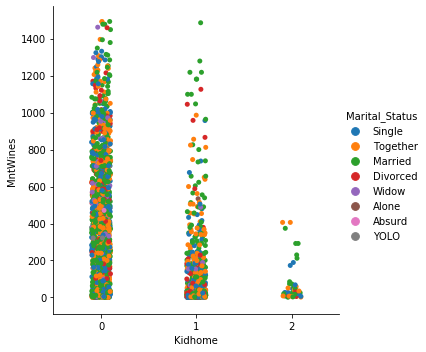

In [49]:
sns.catplot(data=data, x='Kidhome', y='MntWines', hue='Marital_Status')

In [50]:
data[kid]['MntWines'].describe()

count     947.000000
mean      102.902851
std       193.222415
min         0.000000
25%         9.500000
50%        25.000000
75%        98.000000
max      1486.000000
Name: MntWines, dtype: float64

In [51]:
data[noKid]['MntWines'].describe()

count    1293.000000
mean      451.173241
std       343.055729
min         0.000000
25%       168.000000
50%       398.000000
75%       675.000000
max      1493.000000
Name: MntWines, dtype: float64

## 학력별 소득 비교

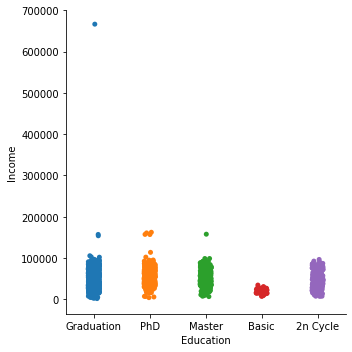

In [52]:
sns.catplot(data=data, x="Education", y="Income")

In [53]:
t = data.Income < 200000

C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\82104\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.5% of the points

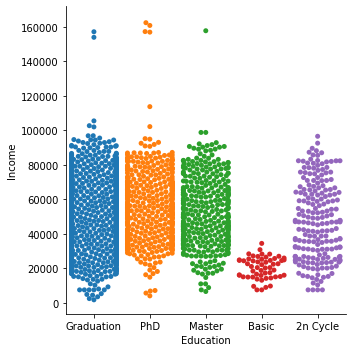

In [54]:
sns.catplot(data=data[t], x="Education", y="Income", kind='swarm')

In [55]:
Graduation = data.Education=='Graduation'
PhD = data.Education=='PhD'
Master = data.Education=='Master'
twoCycle = data.Education=='2n Cycle'
Basic = data.Education=='Basic'

In [56]:
G_Income=np.average(data[Graduation]["Income"].dropna())
P_Income=np.average(data[PhD]["Income"].dropna())
M_Income=np.average(data[Master]["Income"].dropna())
B_Income=np.average(data[Basic]["Income"].dropna())
C_Income=np.average(data[twoCycle]["Income"].dropna())
print(G_Income)
print(P_Income)
print(M_Income)
print(B_Income)
print(C_Income)

52720.37365591398
56145.31392931393
52917.53424657534
20306.25925925926
47633.19
